In [22]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [3]:

STUDENT = "Gal Dahan and Evyater Shpitzer"
ASSIGNMENT = 3

# Q1
Model quality [25 points]
I build a new model for music recommendation, and it gave 1235 good recommendations out of 1600. The
previous model is known to give 75% of good recommendations. Can I be sure that my model is an
improvement? Provide an analytical p-value and a bootstrapped one to test the null hypothesis of no
improvement vs the alternative of positive improvement.

In [71]:
new_mean = 1235/1600
prev_mean = 0.75
new_mean*100

77.1875

In [93]:
N = 2000
arr = np.random.binomial(1, new_mean, 1600)
num_of_ones = []
for _ in range(N):
    num_of_ones.append(np.random.choice(arr, 1600, replace=True).sum()) # how many 1's in 1600 samples


In [92]:
np.sum(np.asarray(num_of_ones) >1235) / N

0.3722

AttributeError: 'numpy.float64' object has no attribute 'set_facecolor'

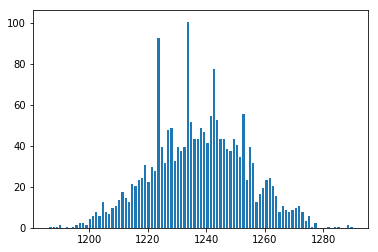

In [109]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(np.asarray(num_of_ones), edgecolor='white', linewidth=1, bins = len(np.unique(np.asarray(num_of_ones)))
)
patches[49].set_facecolor('b')
patches[50].set_facecolor('b')
patches[51].set_facecolor('b')
#plt.hist(np.asarray(num_of_ones), bins='auto')

In [113]:

len(num_of_ones) / len(bins)

21.27659574468085

# Q2
Comparing salaries [25 points]
The data are salaries corresponding to two kinds of occupations: (1) creative, media, and marketing and (2)
education. Suppose that the datasets are modeled as realizations of normal distributions. Test the null
hypothesis that the salary for both occupations is the same at 5% significance level. Don’t assume equal
variance in two groups.

In [4]:
with open("s1.txt","r") as f_input1:
    s1 = np.loadtxt(f_input1, delimiter=",")

with open("s2.txt","r") as f_input2:
    s2 = np.loadtxt(f_input2, delimiter=",")

s1_mean = np.mean(s1)
s2_mean = np.mean(s2)

s1_var = np.var(s1)
s2_var = np.var(s2)
s1_s2_var = np.var(s1-s2)

H0 says that s1_mean == s2 mean at 5% significance level:

In [6]:
s1_mean - s2_mean

-2407.7361111111095

we dont know what is the variance so we should use t test:

In [7]:
t = (s2_mean - s1_mean) / np.sqrt(s2_var/s2.shape[0] + s1_var/s1.shape[0])
1-scipy.stats.t(df = s1.shape[0] + s2.shape[0] -2).cdf(t)


0.016830487412686335

hypothesis is FALSE


calculation made base on:
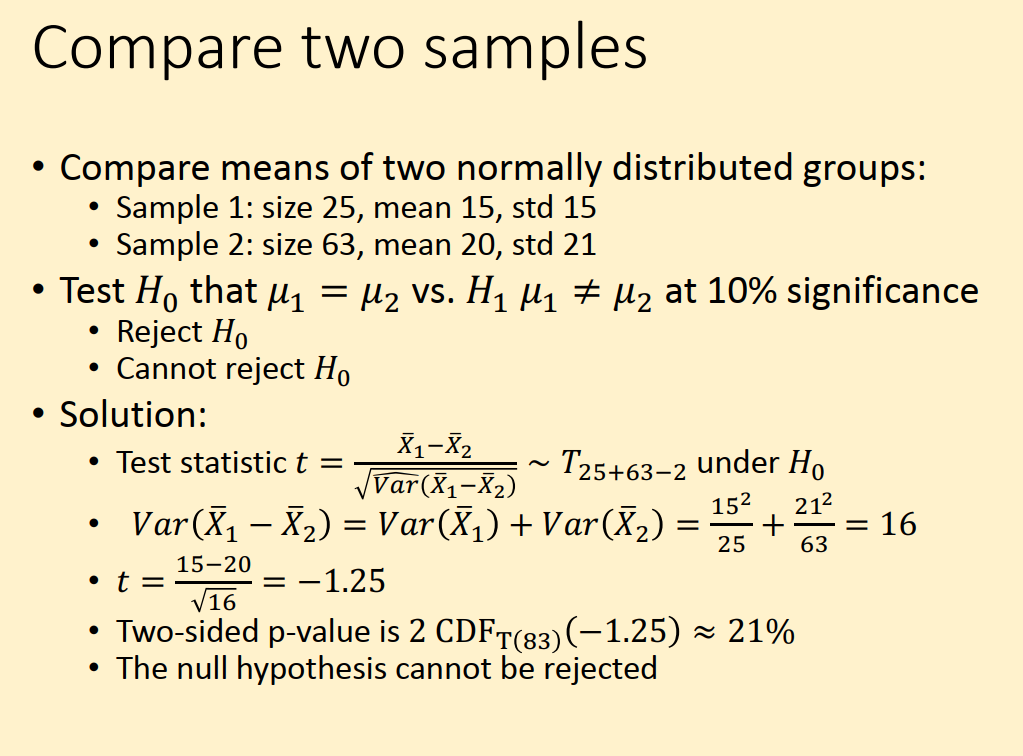

# Q3
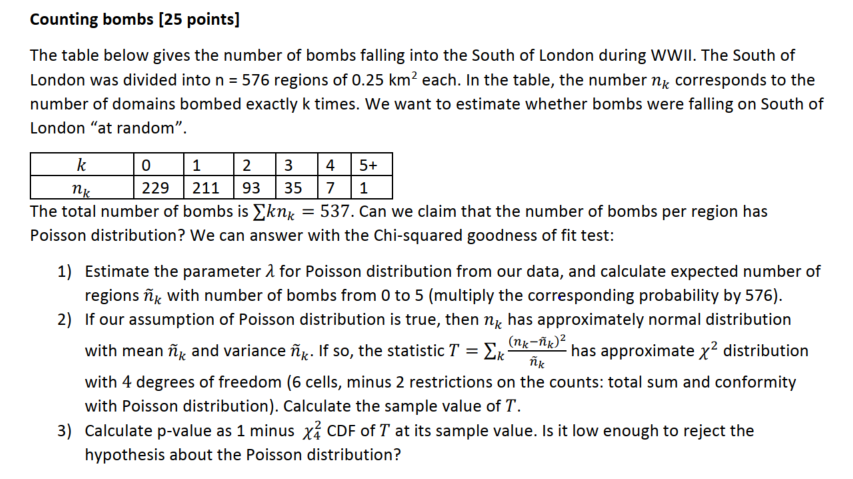

1)

In [15]:
lamda = 537 / 576
prob = scipy.stats.poisson.cdf(6, lamda)
576*prob

575.9688841804219

2)

# Q4
In the previous home assignment, you worked with the file russian_cities_g_9k.csv to fit the
parameters of Pareto distribution. Now, use Kolmogorov-Smirnov method to test whether the data was
really generated by the Pareto distributions with the parameters you have found.

In [45]:
my_data = np.genfromtxt('russian_cities_g_9k_orig.csv', delimiter=',')
dist = scipy.stats.pareto(scipy.stats.pareto.fit(my_data))
scipy.stats.pareto.fit(my_data)

(0.6797613897132792, -17.744755011481796, 9035.74475118985)

In [48]:
#dist = scipy.stats.pareto(scipy.stats.pareto.fit(my_data))
dist = scipy.stats.pareto(0.6797613897132792, 9035.74475118985)
scipy.stats.kstest(my_data, dist.cdf)

KstestResult(statistic=0.9716892726590945, pvalue=0.0)

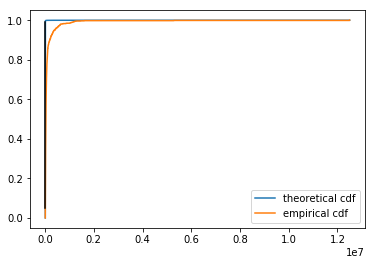

In [47]:
grid = np.linspace(my_data.min()-0.01, my_data.max() + 0.01, num=10000)
theor_cdf = dist.cdf(grid)
true_cdf = np.array([(my_data<val).mean() for val in grid])
plt.plot(grid, theor_cdf)
plt.plot(grid, true_cdf)
plt.legend(['theoretical cdf', 'empirical cdf']);
ad = np.abs(theor_cdf - true_cdf)
idxm = ad.argmax()
plt.plot(grid[[idxm, idxm]], [theor_cdf[idxm], true_cdf[idxm]], color='k');